In [22]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

from numpy import *

#from statistics import *

import plotly.express as px

import plotly.graph_objects as go

import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

#import dfply

#from dfply import *

#import pandas as pd

#from plotnine import *

#from plotnine.data import *


                                                    Read in data

In [2]:

EssayFilePath = "C:/Users/mbles/Desktop/Vaccines are Beneficial.txt"

ResumeFilePath = "C:/Users/mbles/Desktop/Resume.txt"

LabFilePath = "C:/Users/mbles/Desktop/EEE 334 Lab 1.txt"


EssayLines = ""

Resumelines = ""

LabLines = ""


def Read(FilePath, lines):
    with open(FilePath, "r", encoding = 'utf-8') as File:
        lines = File.read()
    return(lines)

try:    
    EssayText = Read(EssayFilePath, EssayLines)
except:
    EssayFilePath = input("Please enter the file path for the essay.\n")
    EssayText = Read(EssayFilePath, EssayLines)

try:
    ResumeText = Read(ResumeFilePath, Resumelines)
except:
    ResumeFilePath = input("\nPlease enter the file path for the resume.\n")
    ResumeText = Read(ResumeFilePath, Resumelines)
    
try:    
    LabText = Read(LabFilePath, LabLines)
except:
    LabFilePath = input("\nPlease enter the file path for the lab report.\n")
    

                                                Clean  and Sort Data

In [14]:
non_letter_characters = ['[','@','_','!','#','$','%','^','&','*',
                      '(',')','<','>','?','/', '}','{','~',':',']',
                         ',','0', '1','2','3','4','5','6','7','8',
                         '9','\t','\n', ' ', '"', "'", '-','.',';',
                         '=','—','-','–','‘','“','”','\ufeff','…','’',
                         '\\\\', '\\', " \ ", ' n ', '  ','    ','   ',
                         '  n ', '⋅', '→','|', '〖', '〗','√','ω','μ','µa',
                         'π','+','δ','°','≈','\u2008','\u2008f','\u2061',
                         '∫','▒','±','●','δ','ω', 'ω	', 'µ', 'δ']

def CleanData(Text):
    for i in non_letter_characters:
        Text = Text.replace(i,' ')
    
    Text = Text.lower()
    
    return(Text)

EssayText = CleanData(EssayText)

ResumeText = CleanData(ResumeText)

LabText = CleanData(LabText) 

                                                 Get Letter Frequencies  

In [23]:
def GetFrequencies(Text):  
    LetterFrequencies = {}
    for keys in Text:
        LetterFrequencies[keys] = LetterFrequencies.get(keys, 0) + 1
    return(LetterFrequencies)

EssayFrequencyDict = GetFrequencies(EssayText)

ResumeFrequencyDict = GetFrequencies(ResumeText)

LabFrequencyDict = GetFrequencies(LabText)

                                                Convert to Data Frames and Sort

In [24]:
def ConvertAndSort(FrequencyDict, column2):
    Frequency_df = pd.DataFrame(FrequencyDict.items(), columns=['Letter', column2]) 

    Frequency_df = Frequency_df.sort_values("Letter")

    Frequency_df = Frequency_df[Frequency_df.Letter != " "].reset_index()  #renumber rows from 0 to 1 from the top down
    
    Frequency_df.pop('index')  #remove column containing prior order as I have no need of it
    
    return(Frequency_df)
    
EssayFrequency_df = ConvertAndSort(EssayFrequencyDict, 'Essay Frequency')

ResumeFrequency_df = ConvertAndSort(ResumeFrequencyDict, 'Resume Frequency')

LabFrequency_df = ConvertAndSort(LabFrequencyDict, 'Lab Frequency')


                                                               Merge Dataframes

In [19]:
#"Letter" columnin each df is the same, so two of them are being concantenated without it

temp = pd.concat([EssayFrequency_df, ResumeFrequency_df.drop(['Letter'], axis = 1, inplace = False)], axis = 1, join = 'outer')

merged_data = pd.concat([temp, LabFrequency_df.drop(['Letter'], axis = 1, inplace = False)], axis = 1, join = 'outer')

merged_data.head()

Letter  Essay Frequency  Resume Frequency  Lab Frequency
0      a             1223               233            996
1      b              163                37            187
2      c              650               185            448
3      d              503               108            448
4      e             1901               300           1471

                                                         Get Summary Stats

In [37]:
SummaryStats = (merged_data.describe()).round(decimals = 2)

SummaryStats

print(SummaryStats)

merged_data.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 
                     'h', 'i', 'j', 'k', 'l', 'm', 'n', 
                     'o', 'p', 'q', 'r', 's', 't', 'u', 
                     'v', 'w', 'x', 'y', 'z']
merged_data = merged_data.drop('Letter', axis = 1)

GroupByLetter = merged_data.transpose()


SummaryStatsByLetter = (GroupByLetter.describe()).round(decimals = 2)

SummaryStatsByLetter

       Essay Frequency  Resume Frequency  Lab Frequency
count            26.00             26.00          26.00
mean            530.85            110.31         479.31
std             477.23             95.49         392.24
min               7.00              5.00          14.00
25%             189.00             27.25         197.00
50%             332.00             93.00         375.00
75%             864.25            185.00         809.00
max            1901.00            300.00        1471.00


a       b       c       d        e       f       g       h  \
count     3.00    3.00    3.00    3.00     3.00    3.00    3.00    3.00   
mean    817.33  129.00  427.67  353.00  1224.00  213.67  180.33  402.00   
std     518.62   80.57  233.17  213.95   828.59  155.66   80.39  298.83   
min     233.00   37.00  185.00  108.00   300.00   34.00   90.00   62.00   
25%     614.50  100.00  316.50  278.00   885.50  166.50  148.50  291.50   
50%     996.00  163.00  448.00  448.00  1471.00  299.00  207.00  521.00   
75%    1109.50  175.00  549.00  475.50  1686.00  303.50  225.50  572.00   
max    1223.00  187.00  650.00  503.00  1901.00  308.00  244.00  623.00   

            i     j  ...      q       r       s        t       u       v  \
count    3.00   3.0  ...   3.00    3.00    3.00     3.00    3.00    3.00   
mean   740.67  13.0  ...  14.67  585.00  667.33   885.33  289.33  195.67   
std    384.53   5.0  ...  15.04  351.74  391.80   554.39  173.61  153.02   
min    298.00   8.0  ...   5.00  185.00  219.00   248.00   99.00   20.00   
25%    615.00  10.5  ...   6.00  454.50  529.00   700.00  214.50  143.50   
50%    932.00  13.0  ...   7.00  724.00  839.00  1152.00  330.00  267.00   
75%    962.00  15.5  ...  19.50  785.00  891.50  1204.00  384.50  283.50   
max    992.00  18.0  ...  32.00  846.00  944.00  1256.00  439.00  300.00   

            w      x       y      z  
count    3.00   3.00    3.00   3.00  
mean   145.00  22.33  148.33  10.00  
std    106.23  18.58   98.44   4.58  
min     25.00   7.00   43.00   5.00  
25%    104.00  12.00  103.50   8.00  
50%    183.00  17.00  164.00  11.00  
75%    205.00  30.00  201.00  12.50  
max    227.00  43.00  238.00  14.00  

[8 rows x 26 columns]

                                                              Boxplots

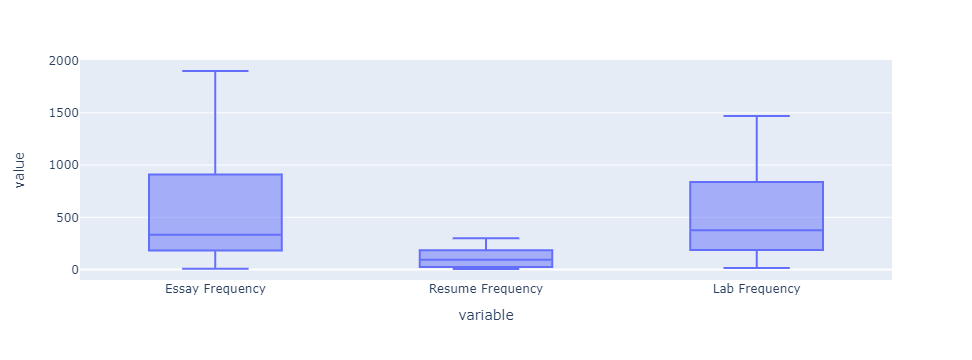

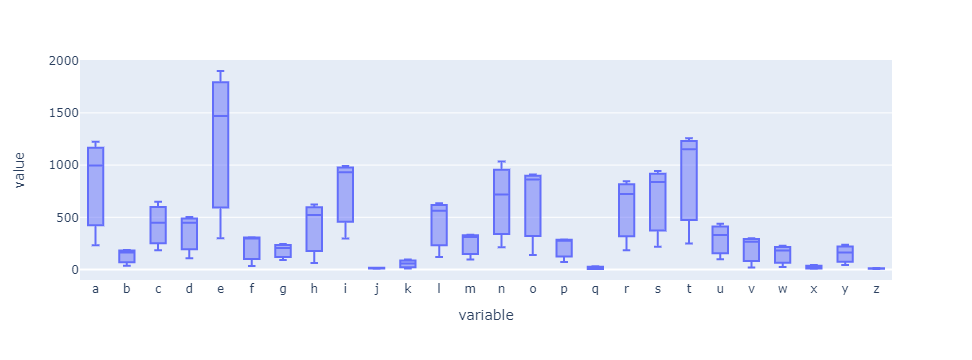

In [38]:
px.box(merged_data, ).show()

px.box(GroupByLetter).show()

                                                             Bar Graphs

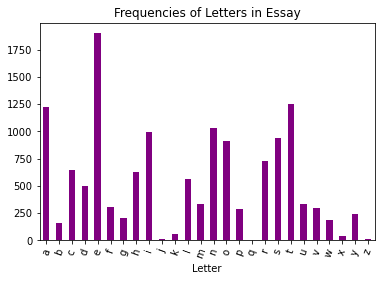

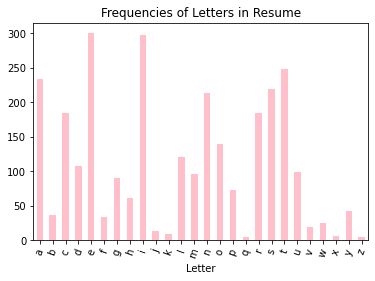

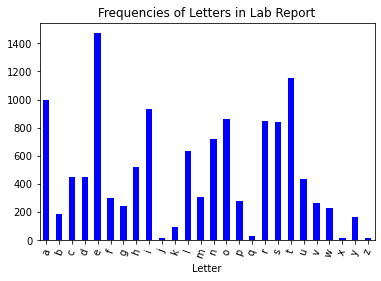

In [41]:
%matplotlib inline

def BarGraph(df, Title, Color, Y):
    bar_graph = df.plot.bar(x = "Letter", y = Y, rot = 70, title = Title, color = Color, legend = False)

BarGraph(EssayFrequency_df, "Frequencies of Letters in Essay", "purple", 'Essay Frequency')

BarGraph(ResumeFrequency_df, "Frequencies of Letters in Resume", "pink", 'Resume Frequency')

BarGraph(LabFrequency_df, "Frequencies of Letters in Lab Report", "blue", 'Lab Frequency')


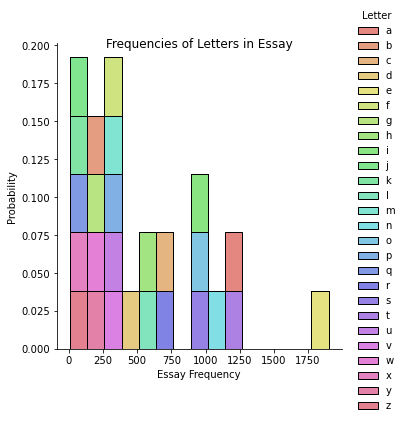

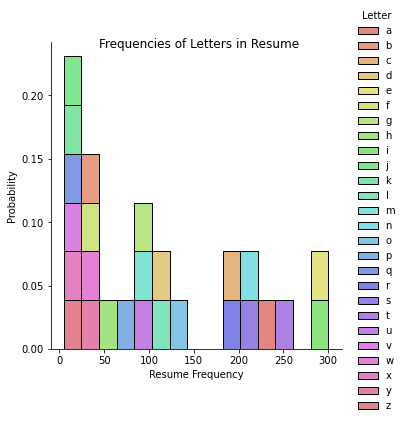

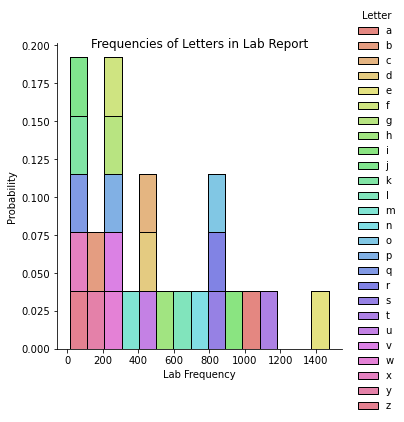

In [42]:
%matplotlib inline

sns.set_palette("hls", 26)

def histogram(df, Title, X):
    hist = sns.displot(df, x = X, bins = 15, hue = 'Letter', multiple = 'stack', stat = 'probability')
    hist.fig.suptitle(Title)
    
histogram(EssayFrequency_df, "Frequencies of Letters in Essay", 'Essay Frequency')
histogram(ResumeFrequency_df, "Frequencies of Letters in Resume", 'Resume Frequency')
histogram(LabFrequency_df, "Frequencies of Letters in Lab Report", 'Lab Frequency')



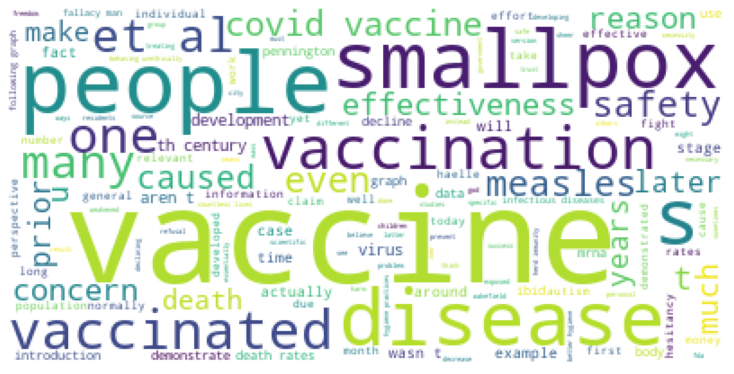

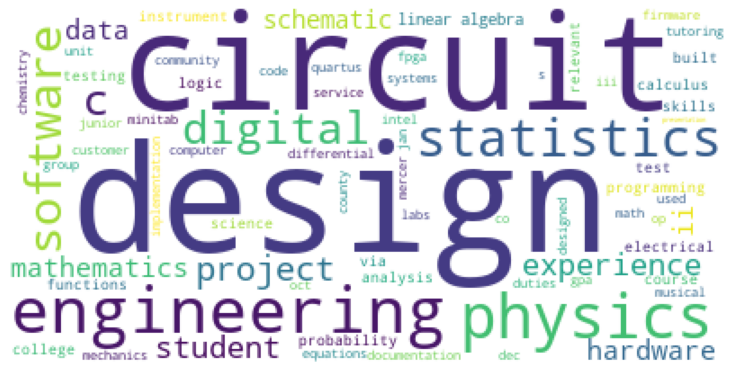

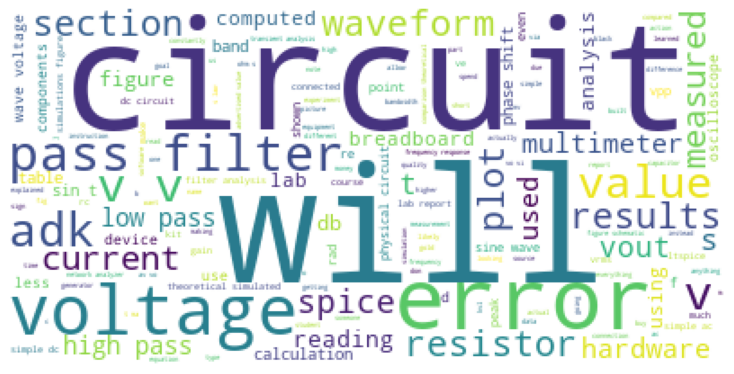

In [43]:

def CreateWordCloud(text):
    #Primary Source for writing this function: https://www.geeksforgeeks.org/generating-word-cloud-python/ 
    
    stopwords = set(STOPWORDS)

    # create wordcloud object
    wordcloud = WordCloud(background_color="white", max_words = 200, stopwords = stopwords)
    wordcloud.generate(text)

    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()
    
CreateWordCloud(EssayText)
CreateWordCloud(ResumeText)
CreateWordCloud(LabText)
